## Upload the github repository with the code

In [1]:
import sys
sys.path.append('/content/RL-Anxiety-MathPsy-ICCC')

In [2]:
!python --version

Python 3.11.12


In [3]:
!git clone https://github.com/Alicia-MJ/RL-Anxiety-MathPsy-ICCC.git

Cloning into 'RL-Anxiety-MathPsy-ICCC'...
remote: Enumerating objects: 1382, done.
remote: Counting objects: 100% (1382/1382), done.
remote: Compressing objects: 100% (666/666), done.
remote: Total 1382 (delta 795), reused 1262 (delta 715), pack-reused 0 (from 0)
Receiving objects: 100% (1382/1382), 28.97 MiB | 14.93 MiB/s, done.
Resolving deltas: 100% (795/795), done.


### Upload packages and specific methods

In [4]:
from neuronav.envs.grid_env import GridEnv, GridSize, GridObservation
from neuronav.agents.td_agents import TDSR_A, TDSR_B
from neuronav.agents.dyna_agents import DynaSR_A, DynaSR_B
from neuronav.envs.grid_templates import GridTemplate
from neuronav.utils import run_episode, plot_values_and_policy, plot_values_and_policy_half
import matplotlib.pyplot as plt
import numpy as np
import time


# **Cliff Walking Task**

# The virtual environment is defined.

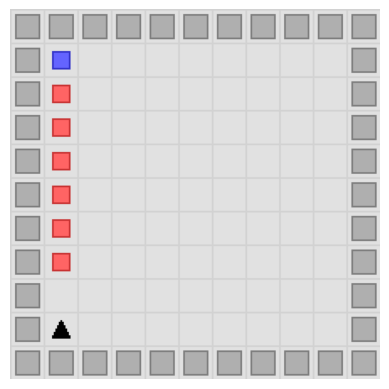

In [5]:
reward_map = {(1, 1): 1.0,  (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

## **Assessment of the Impact of the Punishment Learning Rate**

*The Dyna $\alpha$-SR model was implemented with different values for the punishment learning rate to evaluate the impact of these values on the development of anxiety-related behaviors such as avoidance, risk aversion, overestimation, and generalization of danger. Three different agents were programmed, and for each one, a heatmap of the environment based on the estimated values for each state was generated, along with a graph showing the number of time steps per episode and the reward obtained per episode.*

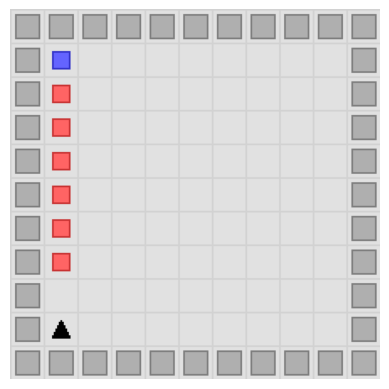

lr_p is 0.05
Proporción de 1: 0.71
Proporción de 0: 0.015
Proporción de -1: 0.275
lr_p is 0.075
Proporción de 1: 0.67
Proporción de 0: 0.005
Proporción de -1: 0.325
lr_p is 0.1
Proporción de 1: 0.64
Proporción de 0: 0.0
Proporción de -1: 0.36
Tiempo total de ejecución para 200 episodios: 2.585169553756714 segundos


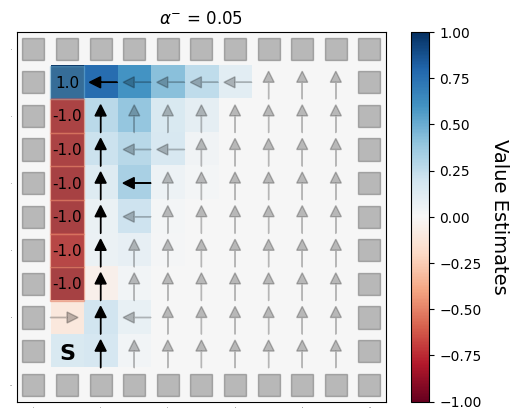

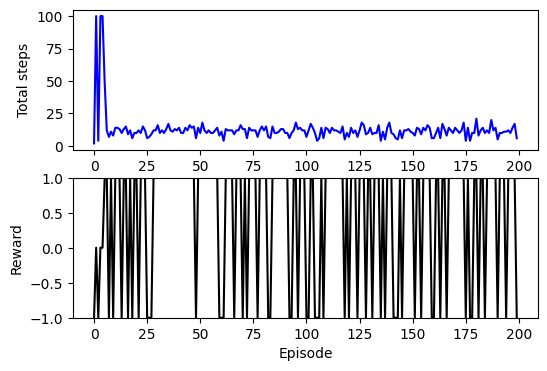

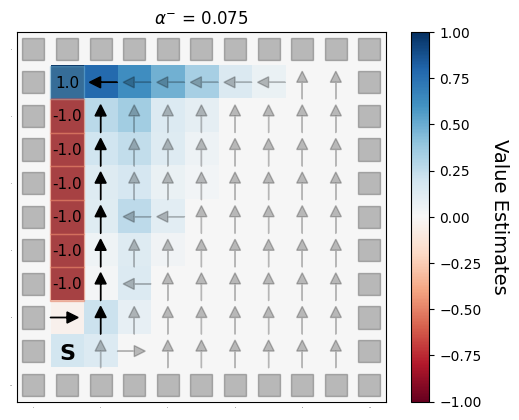

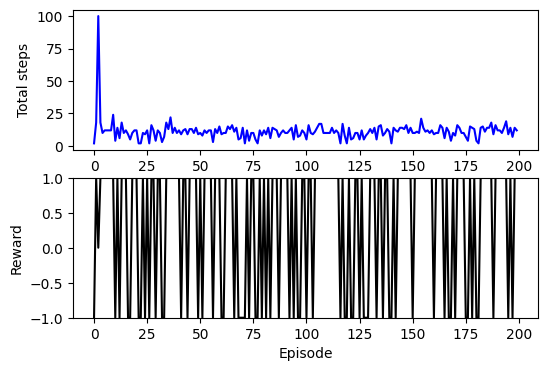

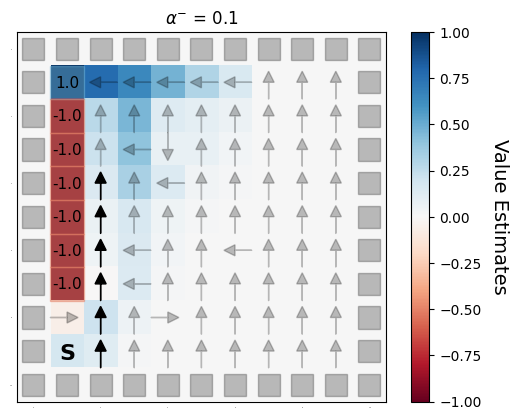

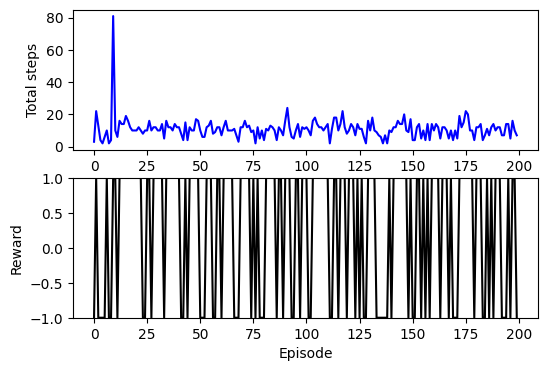

In [295]:
all_returns_a = []
all_steps_a = []


num_episodes = 200
max_steps = 100
lr_p_values = [0.05, 0.075, 0.1]
num_recall = 3

reward_map = {(1, 1): 1.0, (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

start_time = time.time()

for lr_p in lr_p_values:


    agent = DynaSR_A(
        env.state_size,
        env.action_space.n,
        lr=0.05,
        gamma=0.9,
        poltype="egreedy",
        epsilon=0.2,
        num_recall=num_recall,
        lr_p=lr_p
    )

    total_steps = []
    tot_returns = []

    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=max_steps, objects={"rewards": reward_map}, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)


    all_returns_a.append(tot_returns)
    all_steps_a.append(total_steps)

    plot_values_and_policy(agent, env, start_pos, f"$\\alpha^{{-}}$ = {lr_p}", objects={"rewards": reward_map})

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Total steps')
    ax1.set_xlabel('Episode')

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Reward')
    ax2.set_xlabel('Episode')
    ax2.set_ylim(-1,1)

    print(f'lr_p is {lr_p}')

    fr_1 = (tot_returns.count(-1))/len(tot_returns)
    fr_0 = tot_returns.count(0)/len(tot_returns)
    fr_n = tot_returns.count(1)/len(tot_returns)

    print(f"Proporción de 1: {fr_n}")
    print(f"Proporción de 0: {fr_0}")
    print(f"Proporción de -1: {fr_1}")

# Fin del temporizador
end_time = time.time()

# Cálculo del tiempo total de ejecución en segundos
total_time = end_time - start_time
print(f"Tiempo total de ejecución para {num_episodes} episodios: {total_time} segundos")


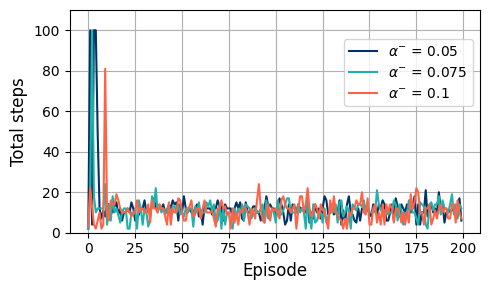

In [317]:
import matplotlib.pyplot as plt

alpha_values = [0.05, 0.075, 0.1]
colors_alpha = ['#003366', '#20B2AA', '#FF6347']  # Rojo, púrpura, verde oliva

plt.figure(figsize=(5, 3))
for i in range(0, 3):  # Últimos tres vectores
    plt.plot(all_steps_a[i], label=f"$\\alpha^{{-}}$ = {alpha_values[i-3]}", color=colors_alpha[i-3])

plt.xlabel("Episode", fontsize=12)
plt.ylabel("Total steps", fontsize=12)
plt.ylim(0, 110)
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(True)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.90), frameon=True)
plt.tight_layout()
plt.show()

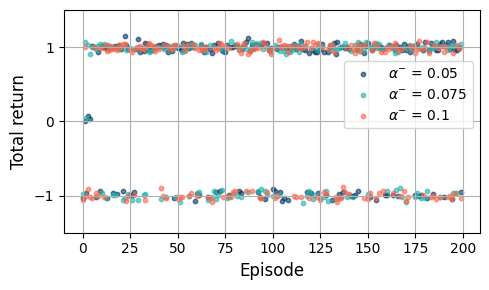

In [316]:
import matplotlib.pyplot as plt
import numpy as np

alpha_values = [0.05, 0.075, 0.1]
colors_alpha = ['#003366', '#20B2AA', '#FF6347']  # Azul oscuro, verde, naranja
blue_alpha = 0.8  # Cambia este valor entre 0 (totalmente transparente) y 1 (opaco)

plt.figure(figsize=(5, 3))

for i in range(3):
    returns = np.array(all_returns_a[i])
    episodes = np.arange(len(returns))

    jitter = np.random.normal(loc=0, scale=0.04, size=len(returns))
    returns_jittered = returns + jitter

    alpha_val = grblue_alpha if 0 == 1 else 0.6

    plt.scatter(episodes, returns_jittered, label=f"$\\alpha^{{-}}$ = {alpha_values[i]}",
                color=colors_alpha[i], s=10, alpha=alpha_val)

plt.xlabel("Episode", fontsize=12)
plt.ylabel("Total return", fontsize=12)
plt.ylim(-1.5, 1.5)
plt.yticks([-1, 0, 1])
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.80), frameon=True)
plt.tight_layout()
plt.show()

## **Assessment of the Impact of the Punishment Sensitivity Parameter**



*The Dyna $\beta$-SR model was implemented with different values for the reward sensitivity parameter ($\omega$) and its complement (1-$\omega$), the punishment sensitivity parameter, to evaluate the impact of these values on the development of anxiety-related behaviors such as avoidance, risk aversion, overestimation, and generalization of danger. Three different agents were programmed, and for each one, a heatmap of the environment based on the estimated values for each state was generated, along with a graph showing the number of time steps per episode and the reward obtained per episode.*

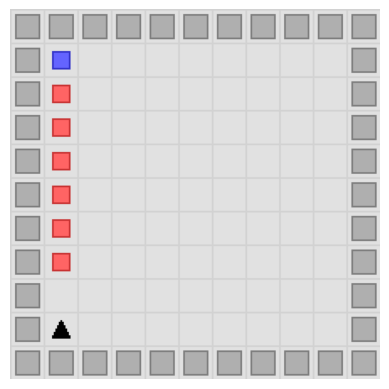

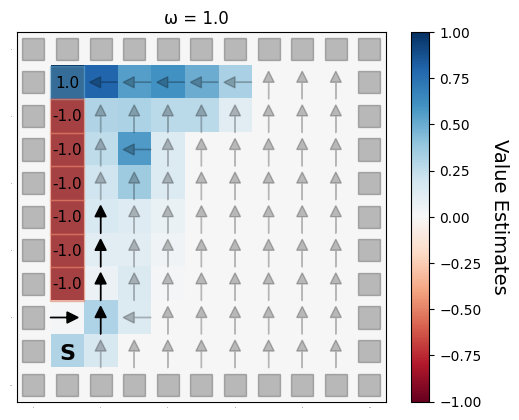

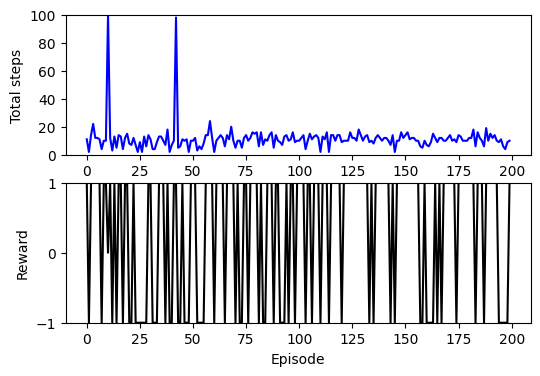

W is 1.0
Proporción de 1: 0.655
Proporción de 0: 0.005
Proporción de -1: 0.34


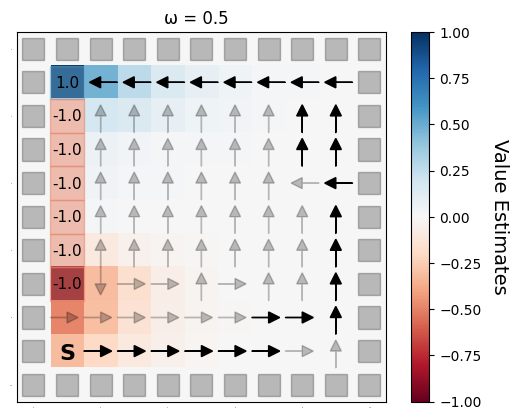

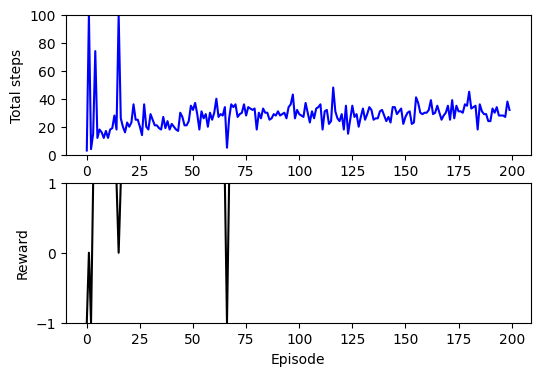

W is 0.5
Proporción de 1: 0.975
Proporción de 0: 0.01
Proporción de -1: 0.015


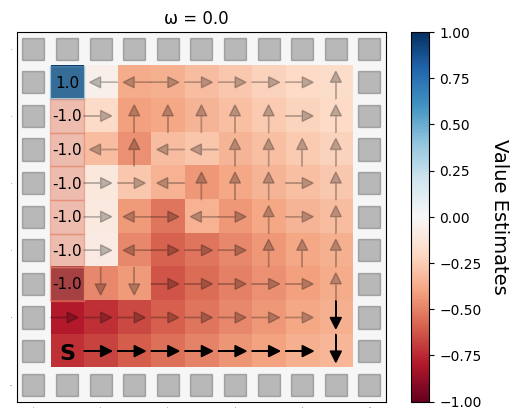

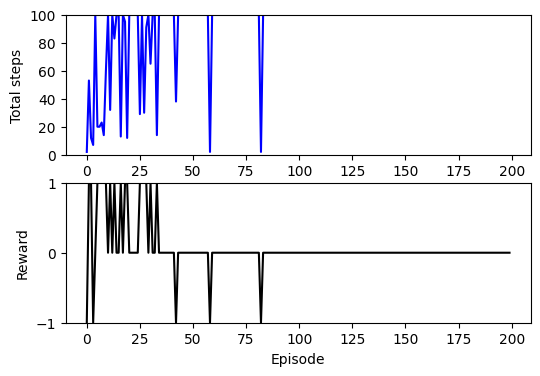

W is 0.0
Proporción de 1: 0.09
Proporción de 0: 0.885
Proporción de -1: 0.025
Tiempo total de ejecución para 200 episodios: 15.488682985305786 segundos


In [247]:

all_returns = []
all_steps = []

num_episodes = 200
max_steps = 100
w_values = [1.0, 0.5, 0.0]
num_recall = 3


reward_map = {(1, 1): 1.0,  (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

start_time = time.time()

for w_value in w_values:


    agent = DynaSR_B(
        env.state_size,
        env.action_space.n,
        lr=0.05,
        gamma=0.9,
        poltype="egreedy",
        epsilon=0.2,
        w_value=w_value
    )

    total_steps = []
    tot_returns = []


    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=max_steps, objects={"rewards": reward_map}, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)



    all_returns.append(tot_returns)
    all_steps.append(total_steps)



    plot_values_and_policy(agent, env, start_pos, f"ω = {w_value}  ", objects={"rewards": reward_map})

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Total steps')
    ax1.set_xlabel('Episode')
    ax1.set_ylim(0,100)

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Reward')
    ax2.set_xlabel('Episode')
    ax2.set_ylim(-1,1)
    ax2.set_yticks([-1, 0, 1])

    plt.show()

    print(f'W is {w_value}')

    fr_1 = (tot_returns.count(-1))/len(tot_returns)
    fr_0 = tot_returns.count(0)/len(tot_returns)
    fr_n = tot_returns.count(1)/len(tot_returns)

    print(f"Proporción de 1: {fr_n}")
    print(f"Proporción de 0: {fr_0}")
    print(f"Proporción de -1: {fr_1}")

# Fin del temporizador
end_time = time.time()

# Cálculo del tiempo total de ejecución en segundos
total_time = end_time - start_time
print(f"Tiempo total de ejecución para {num_episodes} episodios: {total_time} segundos")

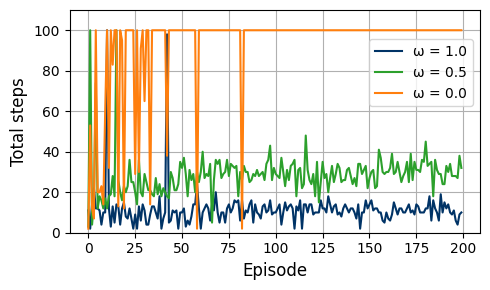

In [315]:
import matplotlib.pyplot as plt

w_values = [1.0, 0.5, 0.0]
colors_default = ['#003366', '#2ca02c', '#ff7f0e']  # Azul, verde, naranja

plt.figure(figsize=(5, 3))
for i in range(3):
    plt.plot(all_steps[i], label=f"ω = {w_values[i]}", color=colors_default[i])

plt.xlabel("Episode", fontsize=12)
plt.ylabel("Total steps", fontsize=12)
plt.ylim(0, 110)
plt.grid(True)
plt.gca().spines['top'].set_visible(True)

# Leyenda alineada a la izquierda (truco: usar loc + prop + bbox_to_anchor si necesario)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.90), frameon=True)


plt.tight_layout()
plt.show()

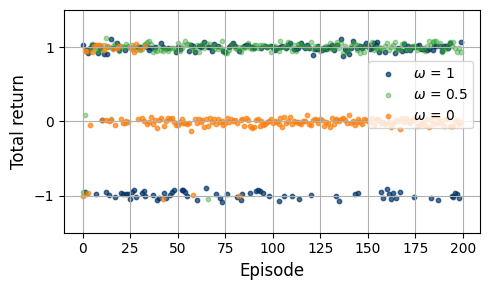

In [314]:
import matplotlib.pyplot as plt
import numpy as np

w_values = [1, 0.5, 0]
colors_alpha = ['#003366', '#2ca02c', '#ff7f0e']  # Azul oscuro, verde, naranja
green_alpha = 0.4  # Cambia este valor entre 0 (totalmente transparente) y 1 (opaco)

plt.figure(figsize=(5, 3))

for i in range(3):
    returns = np.array(all_returns[i])
    episodes = np.arange(len(returns))

    jitter = np.random.normal(loc=0, scale=0.04, size=len(returns))
    returns_jittered = returns + jitter

    alpha_val = green_alpha if i == 1 else 0.7

    plt.scatter(episodes, returns_jittered, label=f"$\\omega$ = {w_values[i]}",
                color=colors_alpha[i], s=10, alpha=alpha_val)

plt.xlabel("Episode", fontsize=12)
plt.ylabel("Total return", fontsize=12)
plt.ylim(-1.5, 1.5)
plt.yticks([-1, 0, 1])
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.80), frameon=True)
plt.tight_layout()
plt.show()